# Twitter Sentiment Analysis

In [1]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

### Dependencies

In [2]:
import nltk
import tweepy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline
nltk.download('vader_lexicon')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Parameters
* Twitter variabels can be created here: http://apps.twitter.com

In [0]:
# My Twitter API Authentication Variables
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

twitter_search_phrase = 'Donald Trump'
number_of_tweets = 1000

### Twitter authentication

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Fetch data and create dataset

In [0]:
tweets = api.search(twitter_search_phrase, count=number_of_tweets)
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

In [6]:
display(data.head(10))
print(tweets[0].created_at)

,Tweets
0,@eugenegu @realDonaldTrump Hello sir can you p...
1,RT @angela_rye: Donald Trump just MIGHT be cal...
2,"RT @noticias4vision: John Bolton, el asesor de..."
3,RT @adamcbest: If you are a conservative conde...
4,RT @matthewjdowd: I ask GOP folks who are sayi...
5,RT @robreiner: Every day the idiot makes the c...
6,@RealSaavedra The liberal MSM is the enemy. I ...
7,RT @B52Malmet: Donald claims his Intel team “g...
8,RT @robreiner: Every day the idiot makes the c...
9,RT @MarkSimoneNY: Russia donated $0 to Donald ...


2019-02-02 02:02:40


### Apply sentiment analysis and process dataset

In [0]:
sid = SentimentIntensityAnalyzer()

listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)

In [0]:
data['polarity'] = se.values
data['negative'] = data['polarity'].apply(lambda x: x['neg'])
data['neutral'] = data['polarity'].apply(lambda x: x['neu'])
data['positive'] = data['polarity'].apply(lambda x: x['pos'])
data['compound'] = data['polarity'].apply(lambda x: x['compound'])

In [9]:
display(data.head(10))

,Tweets,polarity,negative,neutral,positive,compound
0,@eugenegu @realDonaldTrump Hello sir can you p...,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...",0.000,0.874,0.126,0.3182
1,RT @angela_rye: Donald Trump just MIGHT be cal...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,"RT @noticias4vision: John Bolton, el asesor de...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,RT @adamcbest: If you are a conservative conde...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.000,0.884,0.116,0.3612
4,RT @matthewjdowd: I ask GOP folks who are sayi...,"{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'comp...",0.094,0.906,0.000,-0.3400
5,RT @robreiner: Every day the idiot makes the c...,"{'neg': 0.357, 'neu': 0.643, 'pos': 0.0, 'comp...",0.357,0.643,0.000,-0.8779
6,@RealSaavedra The liberal MSM is the enemy. I ...,"{'neg': 0.232, 'neu': 0.639, 'pos': 0.129, 'co...",0.232,0.639,0.129,-0.3777
7,RT @B52Malmet: Donald claims his Intel team “g...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
8,RT @robreiner: Every day the idiot makes the c...,"{'neg': 0.357, 'neu': 0.643, 'pos': 0.0, 'comp...",0.357,0.643,0.000,-0.8779
9,RT @MarkSimoneNY: Russia donated $0 to Donald ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


### Overall sentiment

In [10]:
agg_sentiment = data.agg({'negative' : ['min', 'mean', 'max', 'sum'], 'neutral' : ['min', 'mean', 'max', 'sum'], 'positive' : ['min', 'mean', 'max', 'sum'], 'compound' : ['min', 'mean', 'max', 'sum']})
display(agg_sentiment)

,negative,neutral,positive,compound
min,0.00000,0.35100,0.00000,-0.877900
mean,0.07583,0.86235,0.06176,-0.048303
max,0.64900,1.00000,0.38800,0.804300
sum,7.58300,86.23500,6.17600,-4.830300


### Lowest sentiment value by type

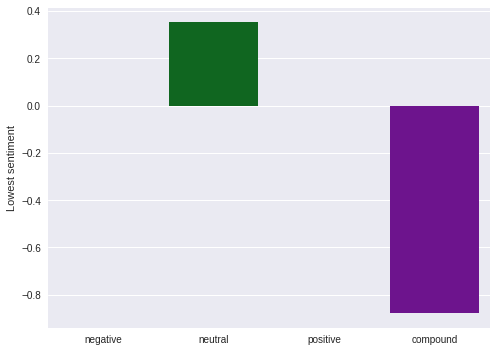

In [11]:
f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=list(agg_sentiment.columns), y=agg_sentiment.loc['min'].values, palette="dark")
ax.set_ylabel("Lowest sentiment")
plt.tight_layout(h_pad=2)
plt.show()

### Mean sentiment value by type

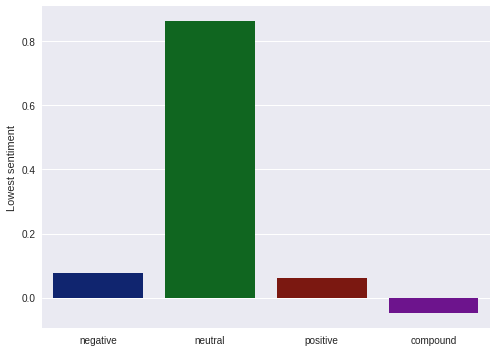

In [12]:
f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=list(agg_sentiment.columns), y=agg_sentiment.loc['mean'].values, palette="dark")
ax.set_ylabel("Lowest sentiment")
plt.tight_layout(h_pad=2)
plt.show()

### Maximum sentiment value by type

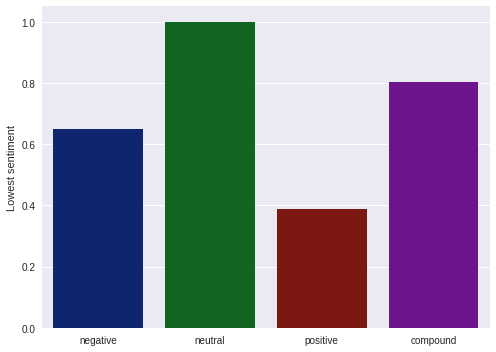

In [13]:
f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=list(agg_sentiment.columns), y=agg_sentiment.loc['max'].values, palette="dark")
ax.set_ylabel("Lowest sentiment")
plt.tight_layout(h_pad=2)
plt.show()

### Overall sentiment value by type

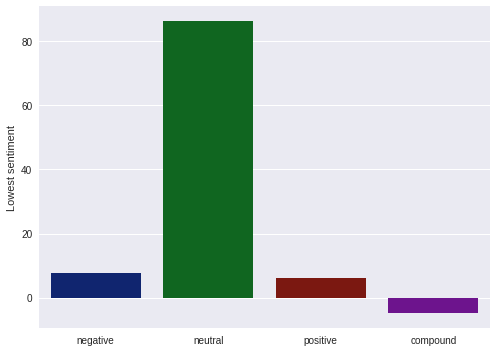

In [14]:
f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=list(agg_sentiment.columns), y=agg_sentiment.loc['sum'].values, palette="dark")
ax.set_ylabel("Lowest sentiment")
plt.tight_layout(h_pad=2)
plt.show()